# Step 12: Channel Flow with Navier-Stokes

The only difference between this step and Step 11 is that we add a source term to the u-momentum equation, to mimic the effect of a pressure-driven channel flow. her's how the Navier-Stokes equations get modified to account for it:


$$  \frac{\partial u}{ \partial t} + u \frac{\partial u}{ \partial x} +  v\frac{\partial u}{ \partial y} = -  \frac{1}{ \rho } \frac{\partial p}{ \partial x} + \nu \left ( \frac{\partial^2 u}{ \partial x^2} + \frac{\partial^2 u}{ \partial y^2} \right ) + F $$

$$  \frac{\partial v}{ \partial t} + u \frac{\partial v}{ \partial x} +  v\frac{\partial v}{ \partial y} = -  \frac{1}{ \rho } \frac{\partial p}{ \partial y} + \nu \left ( \frac{\partial^2 v}{ \partial x^2} + \frac{\partial^2 v}{ \partial y^2} \right ) $$


$$ \frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = -\rho \left ( \frac{\partial u}{ \partial x}  \frac{\partial u}{ \partial x} + 2  \frac{\partial u}{ \partial y}  \frac{\partial v}{ \partial x} +  \frac{\partial v}{ \partial y }  \frac{\partial v}{ \partial y} \right ) $$


## Discretization

We already discretized these equations in the previous step but now we must compensate for the new addition for the new F term. For the 

$$ \frac{u^{n+1}_{i,j} - u^n_{i,j}}{\Delta t} + u^n_{i,j} \frac{u^{n}_{i,j} - u^n_{i-1,j}}{\Delta x} + v^n_{i,j} \frac{u^{n}_{i,j} - u^n_{i,j-1}}{\Delta y} = - \frac{1}{\rho} \frac{p^{n}_{i+1,j}-p^{n}_{i-1,j}}{ 2 \Delta x} + \nu \left ( \frac{u^{n}_{i+1,j}-2 u^{n}_{i,j} + u^{n}_{i-1,j}}{ \Delta x^2} + \frac{u^{n}_{i,j+1}-2 u^{n}_{i,j} + u^{n}_{i,j-1}}{ \Delta y^2} \right ) +F_{i,j}
$$

Similarly for the v equation:

$$ \frac{v^{n+1}_{i,j} - v^n_{i,j}}{\Delta t} + u^n_{i,j} \frac{v^{n}_{i,j} - v^n_{i-1,j}}{\Delta x} + v^n_{i,j} \frac{v^{n}_{i,j} - v^n_{i,j-1}}{\Delta y} = - \frac{1}{\rho} \frac{p^{n}_{i,j+1}-p^{n}_{i,j-1}}{ 2 \Delta y} + \nu \left ( \frac{v^{n}_{i+1,j}-2 v^{n}_{i,j} + v^{n}_{i-1,j}}{ \Delta x^2} + \frac{v^{n}_{i,j+1}-2 v^{n}_{i,j} + v^{n}_{i,j-1}}{ \Delta y^2} \right )
$$

Finally the discretized pressure-poisson equation can be written like so:

$$ \frac{p^n_{i+1,j} - 2 p^n_{i,j} + p^n_{i-1,j}}{\Delta x^2} + \frac{p^n_{i,j+1} - 2 p^n_{i,j} + p^n_{i,j-1}}{\Delta y^2} = \rho \left [ \frac{1}{\Delta t} \left ( \frac{u^n_{i+1,j} -  u^n_{i-1,j}}{2 \Delta x} + \frac{v^n_{i+1,j} -  v^n_{i-1,j}}{2 \Delta y} \right ) - \frac{u_{i+1,j} - u_{i-1,j}}{2 \Delta x} \frac{u_{i+1,j} u_{i-1,j}}{2 \Delta x} - 2\frac{u_{i,j+1} - u_{i,j-1}}{2 \Delta y} \frac{v_{i+1,j} - v_{i-1,j}}{2 \Delta x} - \frac{v_{i,j+1} - v_{i,j-1}}{2 \Delta y} \frac{v_{i,j+1} - v_{i,j-1}}{2 \Delta y} \right ]
$$

As always, we shall write these equations in a rearranged form in the way that the iterations need to proceed in the code. First the momentum equations for the velocity at the next time step:

The momentum in the u direction:

$$ u^{n+1}_{i,j} = u^{n}_{i,j} - u^{n}_{i,j} \frac{\Delta t}{\Delta x} \left ( u^n_{i,j} - u^n_{i-1,j} \right ) - v^n_{i,j} \frac{\Delta t}{\Delta y} \left ( u^n_{i,j} - u^n_{i,j-1} \right ) - \frac{\Delta t}{ \rho 2 \Delta x} \left ( p^n_{i-1,j} - p^n_{i-1,j} \right ) + \nu \left ( \frac{\Delta t}{\Delta x ^2} \left ( u^n_{i+1,j} - 2 u^n_{i,j} + u^{n}{i-1, j} \right ) + \frac{\Delta t}{\Delta y^2} \left ( u^n_{i,j+1} - 2u^n_{i,j} + u^n_{i,j-1} \right ) \right ) + F \Delta t
$$

The momentum in the v direction:

$$ v^{n+1}_{i,j} = v^{n}_{i,j} - u^{n}_{i,j} \frac{\Delta t}{\Delta x} \left ( v^n_{i,j} - v^n_{i-1,j} \right ) - v^n_{i,j} \frac{\Delta t}{\Delta y} \left ( v^n_{i,j} -  v^n_{i,j-1} \right ) - \frac{\Delta t}{ \rho 2 \Delta y} \left ( p^n_{i,j+1} - p^n_{i,j-1} \right ) + \nu \left ( \frac{\Delta t}{\Delta x ^2} \left ( v^n_{i+1,j} - 2 v^n_{i,j} + v^{n}{i-1, j} \right ) + \frac{\Delta t}{\Delta y^2} \left ( v^n_{i,j+1} - 2v^n_{i,j} + v^n_{i,j-1} \right ) \right )
$$

Last but not least, the Pressure-poisson equation:

$$p^n_{i,j} = \frac{\left ( p^n_{i+1,j} + p^n_{i-1,j} \right )\Delta y^2 + \left ( p^n_{i,j+1} + p^n_{i,j-1} \right ) \Delta x^2  }{2 \left ( \Delta x^2 + \Delta y^2 \right )} - \frac{\rho \Delta x^2 \Delta y^2}{2\left (\Delta x^2 + \Delta y^2 \right )} \times \left [ \frac{1}{\Delta t} \left ( \frac{u_{i+1, j} - u_{i-1,j}}{2 \Delta x} + \frac{v_{i, j+1} - v_{i,j-1}}{2 \Delta y} \right ) - \frac{u_{i+1,j} - u_{i-1,j}}{2 \Delta x} \frac{u_{i+1,j} - u_{i-1,j}}{2 \Delta x} - 2 \frac{u_{i,j+1} - u_{i,j-1}}{2 \Delta y} \frac{v_{i+1,j} - v_{i-1,j}}{2 \Delta x} - \frac{v_{i,j+1} - v_{i,j-1}}{2 \Delta y} \frac{v_{i,j+1} - v_{i,j-1}}{2 \Delta y} \right ]
$$

## Initial and Boundary Conditions

The initial conditions are that $ u,v,p = 0$ everywhere and the boundary conditions are as follows:

$ u,v,p \ \text{are periodic on} \ x = 0,2 $

$ u,v = 0 \ \text{at} \ y = 0,2 $

$ \frac{\partial p}{\partial y} = 0 \ \text{at} \ y = 0,2$

$ F = 1$ everywhere.

We now have all we need to begin the simulation! Let's start by importing all the libraries that we shall use and then declare some key functions and variables.

## Libraries and Variable declarations

### Lib import

In [1]:
# Adding inline command to make plots appear under comments
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In step 11 we isolated a part of our tansposed equation ot make it easier to read and we're going to do the same here. One thing to note is that since we have periodic boundary conditions throughout hte grid we need to explicityly calculate the values at the leading and trailing edge of our `u` vector.

## Function Declarations

In [2]:
def build_up_b(rho, dt, dx, dy, u , v):
    b = np.zeros_like(u)
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
                                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                            ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                            2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                                 (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                            ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    
    # Periodic BC Pressure @ x = 2
    b[1:-1, -1] = (rho * (1 / dt * ((u[1:-1, 0] - u[1:-1,-2]) / (2 * dx) +
                                    (v[2:, -1] - v[0:-2, -1]) / (2 * dy)) -
                          ((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 -
                          2 * ((u[2:, -1] - u[0:-2, -1]) / (2 * dy) *
                               (v[1:-1, 0] - v[1:-1, -2]) / (2 * dx)) -
                          ((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))

    # Periodic BC Pressure @ x = 0
    b[1:-1, 0] = (rho * (1 / dt * ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx) +
                                   (v[2:, 0] - v[0:-2, 0]) / (2 * dy)) -
                         ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 -
                         2 * ((u[2:, 0] - u[0:-2, 0]) / (2 * dy) *
                              (v[1:-1, 1] - v[1:-1, -1]) / (2 * dx))-
                         ((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    return b

We also define a periodic pressure poisson iterative function as we did in step 11. Once again we include the periodic boundary conditions at the leading and trailing edge. We also ahve to specify boundary conditions at the top and bottom of our grid

In [3]:
def pressure_poisson_periodic(p, dx, dy):
    pn = np.empty_like(p)
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])

        # Periodic BC Pressure @ x = 2
        p[1:-1, -1] = (((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 +
                        (pn[2:, -1] + pn[0:-2, -1]) * dx**2) /
                       (2 * (dx**2 + dy**2)) -
                       dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, -1])

        # Periodic BC Pressure @ x = 0
        p[1:-1, 0] = (((pn[1:-1, 1] + pn[1:-1, -1])* dy**2 +
                       (pn[2:, 0] + pn[0:-2, 0]) * dx**2) /
                      (2 * (dx**2 + dy**2)) -
                      dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 0])
        
        # Wall boundary conditions, pressure
        p[-1, :] =p[-2, :]  # dp/dy = 0 at y = 2
        p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
    
    return p

### Variable Declarations

In [4]:
nx = 41
ny = 41
nt = 10
nit = 50
c = 1
dx = 2 / (nx - 1) 
dy = 2 / (ny - 1) 

#Initializing arrays
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X,Y = np.meshgrid(x,y)

rho = 1
nu = .1
F = 1
dt = 0.01

#Initializing tu,v and pressure arrays
u  = np.zeros((nx, ny))
un  = np.zeros((nx, ny))

v  = np.zeros((nx, ny))
vn  = np.zeros((nx, ny))

p  = np.ones((nx, ny))
pn  = np.ones((nx, ny))

b  = np.zeros((nx, ny))

## Solving channel flow  in 2D

Next comes the actual core code of our ocmputation and we will reach back to step 9 when we worked on laplace's equation to use a trick we developed then. Since we're only interested in what the grid will look like once we have reached a near-steady-state solution we could either specify a number of timesteps `nt` and increment that value until we're satisfied, or we can tell our code to run until the difference between two consecutive iterations gets samall.

There are also 8 separate boundary conditions that must be met at each iteration. The code below writes them all explicitely.

In [5]:
udiff = 1
stepcount = 0

while udiff > .001:
    un = u.copy()
    vn = v.copy()

    b = build_up_b(rho, dt, dx, dy, u, v)
    p = pressure_poisson_periodic(p, dx, dy)

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * 
                    (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 * 
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     dt / dy**2 * 
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])) + 
                     F * dt)

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / (2 * rho * dy) * 
                    (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                     nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     dt / dy**2 * 
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

    # Periodic BC u @ x = 2     
    u[1:-1, -1] = (un[1:-1, -1] - un[1:-1, -1] * dt / dx * 
                  (un[1:-1, -1] - un[1:-1, -2]) -
                   vn[1:-1, -1] * dt / dy * 
                  (un[1:-1, -1] - un[0:-2, -1]) -
                   dt / (2 * rho * dx) *
                  (p[1:-1, 0] - p[1:-1, -2]) + 
                   nu * (dt / dx**2 * 
                  (un[1:-1, 0] - 2 * un[1:-1,-1] + un[1:-1, -2]) +
                   dt / dy**2 * 
                  (un[2:, -1] - 2 * un[1:-1, -1] + un[0:-2, -1])) + F * dt)

    # Periodic BC u @ x = 0
    u[1:-1, 0] = (un[1:-1, 0] - un[1:-1, 0] * dt / dx *
                 (un[1:-1, 0] - un[1:-1, -1]) -
                  vn[1:-1, 0] * dt / dy * 
                 (un[1:-1, 0] - un[0:-2, 0]) - 
                  dt / (2 * rho * dx) * 
                 (p[1:-1, 1] - p[1:-1, -1]) + 
                  nu * (dt / dx**2 * 
                 (un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1]) +
                  dt / dy**2 *
                 (un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])) + F * dt)

    # Periodic BC v @ x = 2
    v[1:-1, -1] = (vn[1:-1, -1] - un[1:-1, -1] * dt / dx *
                  (vn[1:-1, -1] - vn[1:-1, -2]) - 
                   vn[1:-1, -1] * dt / dy *
                  (vn[1:-1, -1] - vn[0:-2, -1]) -
                   dt / (2 * rho * dy) * 
                  (p[2:, -1] - p[0:-2, -1]) +
                   nu * (dt / dx**2 *
                  (vn[1:-1, 0] - 2 * vn[1:-1, -1] + vn[1:-1, -2]) +
                   dt / dy**2 *
                  (vn[2:, -1] - 2 * vn[1:-1, -1] + vn[0:-2, -1])))

    # Periodic BC v @ x = 0
    v[1:-1, 0] = (vn[1:-1, 0] - un[1:-1, 0] * dt / dx *
                 (vn[1:-1, 0] - vn[1:-1, -1]) -
                  vn[1:-1, 0] * dt / dy *
                 (vn[1:-1, 0] - vn[0:-2, 0]) -
                  dt / (2 * rho * dy) * 
                 (p[2:, 0] - p[0:-2, 0]) +
                  nu * (dt / dx**2 * 
                 (vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1]) +
                  dt / dy**2 * 
                 (vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])))


    # Wall BC: u,v = 0 @ y = 0,2
    u[0, :] = 0
    u[-1, :] = 0
    v[0, :] = 0
    v[-1, :]=0
    
    udiff = (np.sum(u) - np.sum(un)) / np.sum(u)
    stepcount += 1

The code above also includes a new variable called stepcout that keeps track of how many iterations the loop went through before the stop condition was met.

In [6]:
print(stepcount)

499


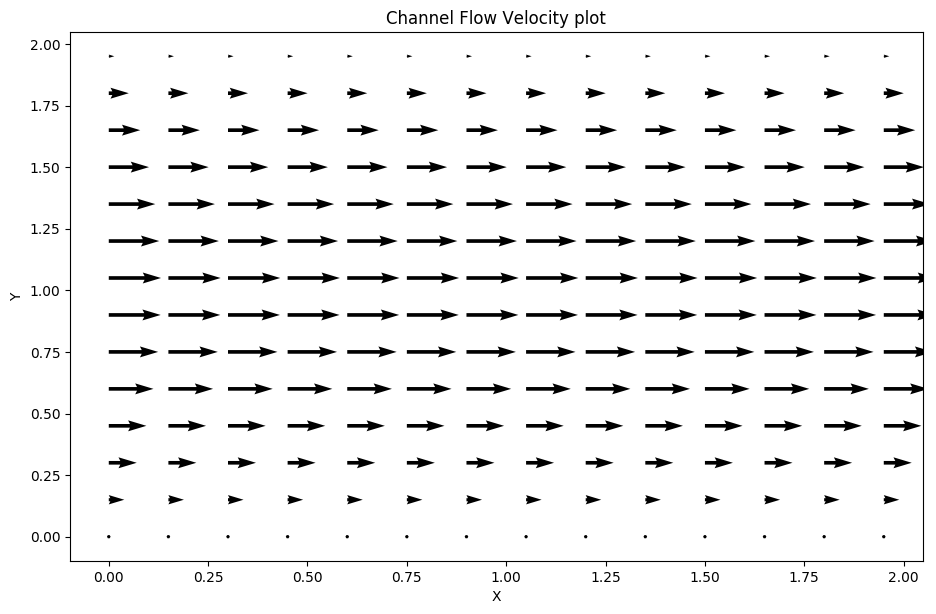

In [7]:
fig = plt.figure(figsize = (11,7), dpi=100)
plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);
plt.xlabel('X')
plt.ylabel('Y');
plt.title('Channel Flow Velocity plot');

### Results

This final image brings this module to a close and showcases how far we have come. Animating this would not be very useful since there is very little transient activity and we only care about the steady state solution. Hence we will skip the work on making an animation for this last step.